Steps to solve Emergency vs Non-Emergency vehicle classification problem using Early Stopping
1. Loading the dataset
2. Pre-processing the data
3. Creating training and validation set
4. Defining the model architecture
5. Compiling the model
6. Setting up Early Stopping
7. Training the model using Early Stopping
8. Evaluating model performance

1. Loading the dataset

In [6]:
# import necessary libraries and functions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from tensorflow.keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

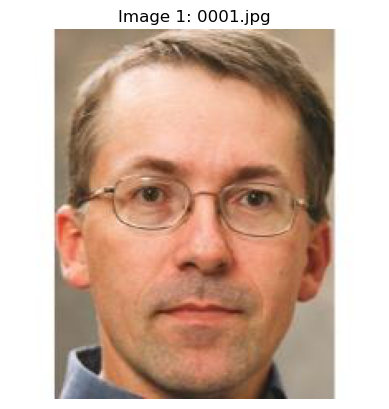

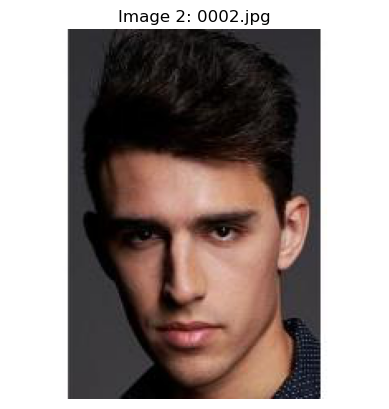

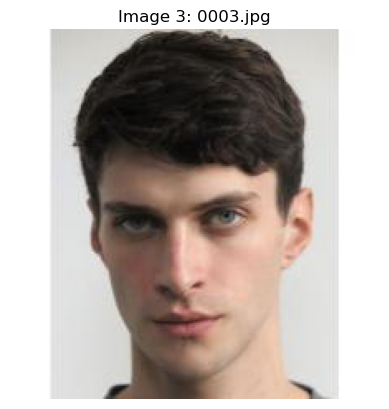

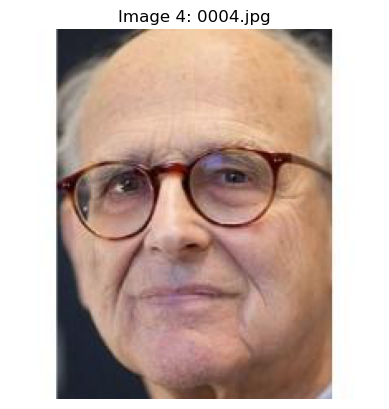

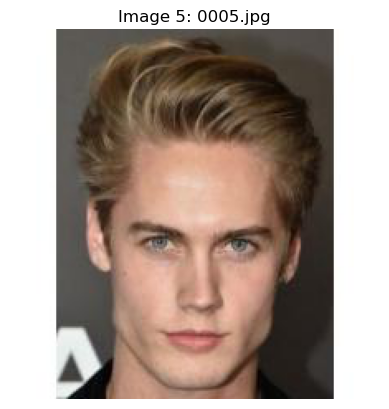

In [7]:
import os
from PIL import Image

def load_and_display_images(image_folder, num_images=5):
    # Get a list of image filenames in the folder
    image_filenames = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    
    # Display the specified number of images
    for i, image_name in enumerate(image_filenames[:num_images]):
        image_path = os.path.join(image_folder, image_name)
        image = Image.open(image_path)
        
        # Display image
        plt.figure()
        plt.imshow(image)
        plt.title(f"Image {i+1}: {image_name}")
        plt.axis('off')
        plt.show()

# Define the image folder path
image_folder_path = '../data/images/'

# Call the function to load and display images
load_and_display_images(image_folder_path, num_images=5)


In [19]:
data_1 = pd.read_csv('../data/train.csv')

In [11]:
data_1.head()

,image_names,class
0,0001.jpg,1
1,0002.jpg,1
2,0003.jpg,1
3,0004.jpg,1
4,0005.jpg,1


In [18]:
data_2 = pd.read_csv('../data/test.csv')

In [13]:
data_2.head()

,image_names
0,0001.jpg
1,0002.jpg
2,0003.jpg
3,0004.jpg
4,0005.jpg


In [14]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [15]:
# distribution of classes in the dataset
data_1['class'].value_counts()

class
1    3150
0    1449
Name: count, dtype: int64

In [17]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data_1.image_names:
    # loading the image using its name
    img = plt.imread('../data/images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data_1['class'].values
#y = data_1.class.values

In [20]:
# shape of the image
X.shape

(4599, 224, 224, 3)

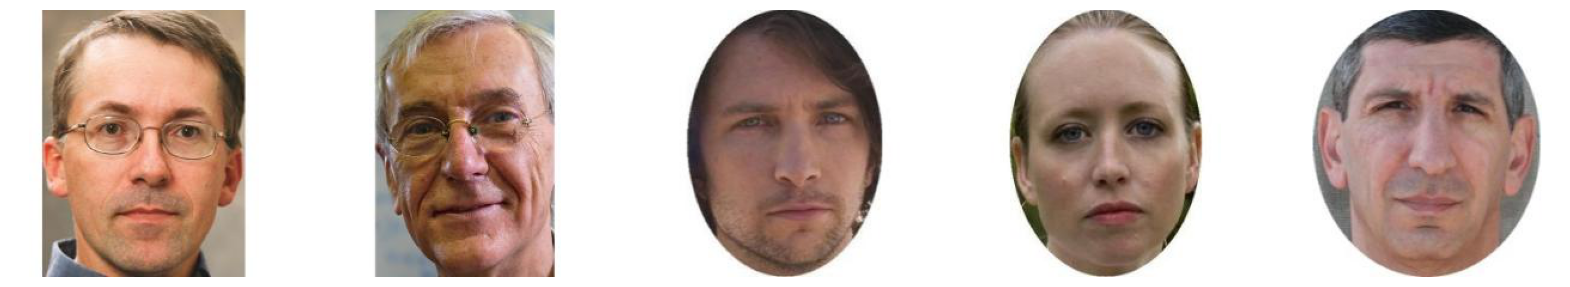

In [21]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

2. Pre-processing the data

In [22]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(4599, 150528)

In [23]:
# minimum and maximum pixel values of images
X.min(), X.max()

(0, 255)

3. Creating training and validation set

In [24]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [25]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((3219, 150528), (3219,)), ((1380, 150528), (1380,)))

4. Defining the model architecture

In [26]:
# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\Staff\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


5. Compiling the model

In [28]:
from tensorflow.keras.optimizers import Adam

# Define the Adam optimizer with a learning rate of 1e-5
adam = Adam(learning_rate=1e-5)

In [29]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

6. Setting up Early Stopping

In [30]:
# importing module for early stopping
from keras.callbacks import EarlyStopping

In [31]:
# setting up early stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, mode='min')

7. Training the model using Early Stopping

In [32]:
# training the model for 100 epochs

# defining the early stopping as callback using callbacks parameter of model.fit
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid), callbacks=[early_stopping])

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 246ms/step - accuracy: 0.5554 - loss: 0.6974 - val_accuracy: 0.6833 - val_loss: 0.6526
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - accuracy: 0.6762 - loss: 0.6532 - val_accuracy: 0.6833 - val_loss: 0.6477
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - accuracy: 0.6715 - loss: 0.6497 - val_accuracy: 0.6833 - val_loss: 0.6437
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 224ms/step - accuracy: 0.6883 - loss: 0.6401 - val_accuracy: 0.6833 - val_loss: 0.6388
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 221ms/step - accuracy: 0.6796 - loss: 0.6391 - val_accuracy: 0.6833 - val_loss: 0.6368
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - accuracy: 0.6766 - loss: 0.6383 - val_accuracy: 0.6833 - val_loss: 0.6327
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 224ms/step - accuracy: 0.6792 - loss: 0.6343 - val_accuracy: 0.6833 - val_loss: 0.6309
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.6844 - loss: 0.6296 - val_acc

8. Evaluating model performance

In [33]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid,(model.predict(X_valid) > 0.5).astype("int32")[:, 0]), '%')

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Accuracy on validation set: 0.6833333333333333 %


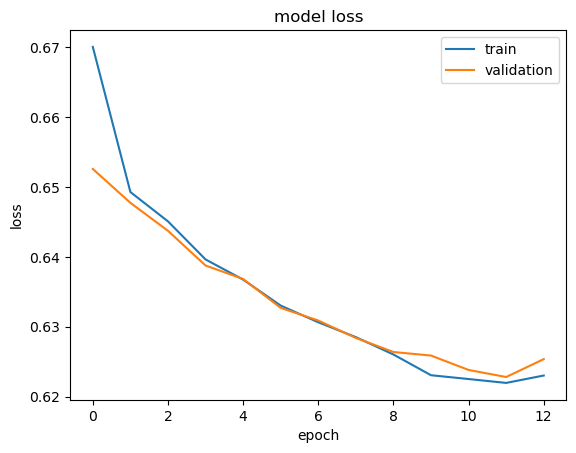

In [34]:
 # summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Hyperparameter tuning for Early Stopping (Increasing the patience value)

In [35]:
# defining and compiling the model

# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

C:\Users\Staff\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [36]:
# increasing the patience and threshold value
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, mode='min')

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Example input shape, replace with your actual input shape
input_shape = (X_train.shape[1],)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=input_shape),
    Dense(1, activation='sigmoid')
])

# Initialize the Adam optimizer with a learning rate of 1e-5
adam = Adam(learning_rate=1e-5)

# Compile the model with the Adam optimizer
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model_history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping]
)


C:\Users\Staff\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.6056 - loss: 148.4660 - val_accuracy: 0.6239 - val_loss: 27.7986
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.7015 - loss: 20.3472 - val_accuracy: 0.5630 - val_loss: 15.4193
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.7093 - loss: 9.7531 - val_accuracy: 0.7109 - val_loss: 6.4585
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.7362 - loss: 6.2902 - val_accuracy: 0.7225 - val_loss: 5.5065
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.7293 - loss: 5.8146 - val_accuracy: 0.7507 - val_loss: 6.2540
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.7555 - loss: 4.9549 - val_accuracy: 0.7580 - val_loss: 5.3358
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.7401 - loss: 5.4878 - val_accuracy: 0.7558 - val_loss: 4.4264
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.7690 - loss: 4.1419 - val

In [41]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, (model.predict(X_valid) > 0.5).astype("int32")[:, 0]), '%')

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Accuracy on validation set: 0.8079710144927537 %


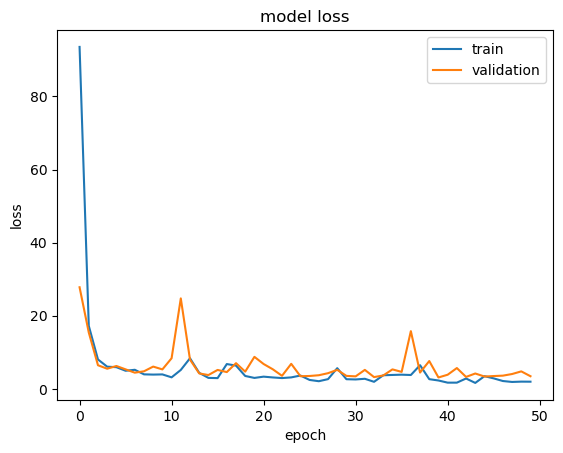

In [42]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Steps to solve Emergency vs Non-Emergency vehicle classification problem using Dropout
1. Loading the dataset
2. Pre-processing the data
3. Creating training and validation set
4. Defining the model architecture
* Adding dropout layer(s)
5. Compiling the model
6. Training the model using Dropout
7. Evaluating model performance

4. Defining the model architecture
Adding dropout layer(s)

In [43]:
# importing the dropout layer
from keras.layers import Dropout

In [44]:
# defining the model architecture with dropout layer
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\Staff\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


5. Compiling the model

In [46]:
# Define the Adam optimizer with a learning rate of 1e-5
adam = Adam(learning_rate=1e-5)

In [47]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

6. Training the model using Dropout

In [48]:
# training the model for 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 247ms/step - accuracy: 0.6453 - loss: 0.7060 - val_accuracy: 0.6833 - val_loss: 0.6315
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.6635 - loss: 0.6744 - val_accuracy: 0.6833 - val_loss: 0.6308
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - accuracy: 0.6707 - loss: 0.6704 - val_accuracy: 0.6833 - val_loss: 0.6303
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - accuracy: 0.6571 - loss: 0.6845 - val_accuracy: 0.6833 - val_loss: 0.6295
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - accuracy: 0.6524 - loss: 0.6831 - val_accuracy: 0.6833 - val_loss: 0.6290
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 221ms/step - accuracy: 0.6531 - loss: 0.6946 - val_accuracy: 0.6833 - val_loss: 0.6284
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 224ms/step - accuracy: 0.6703 - loss: 0.6584 - val_accuracy: 0.6833 - val_loss: 0.6281
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - accuracy: 0.6508 - loss: 0.6737 - val_acc

7. Evaluating model performance

In [49]:
predictions = (model.predict(X_valid) > 0.5).astype("int32")

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [50]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, predictions[:, 0]), '%')

Accuracy on validation set: 0.6833333333333333 %


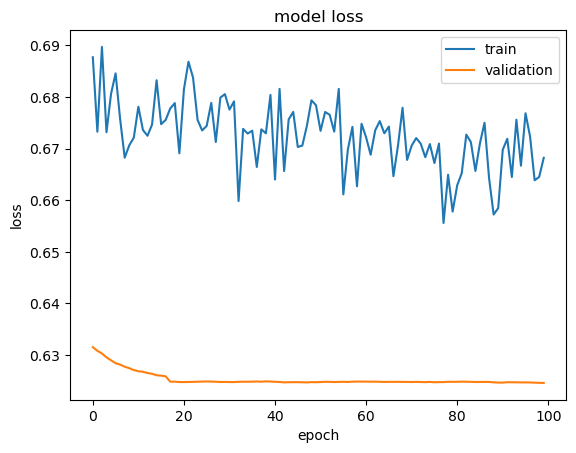

In [51]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Gradient Clipping in Keras
1. Loading the dataset
2. Pre-processing the data
3. Creating training and validation set
4. Defining the model architecture
5. Compiling the model
* Define clipvalue while defining the optimizer
6. Training the model
7. Evaluating model performance

3. Creating training and validation set

In [52]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [53]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((3219, 150528), (3219,)), ((1380, 150528), (1380,)))

4. Defining the model architecture

In [54]:
# defining the model architecture with dropout layer
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\Staff\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


5. Compiling the model

In [56]:
# Define the Adam optimizer with a learning rate of 1e-5 and gradient clipping
adam = Adam(learning_rate=1e-5, clipvalue=1.0)

In [57]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

6. Training the model

In [58]:
# training the model for 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 0.6779 - loss: 0.6312 - val_accuracy: 0.6833 - val_loss: 0.6284
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 250ms/step - accuracy: 0.6887 - loss: 0.6245 - val_accuracy: 0.6833 - val_loss: 0.6261
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step - accuracy: 0.6772 - loss: 0.6293 - val_accuracy: 0.6833 - val_loss: 0.6261
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - accuracy: 0.6835 - loss: 0.6241 - val_accuracy: 0.6833 - val_loss: 0.6254
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 235ms/step - accuracy: 0.6846 - loss: 0.6240 - val_accuracy: 0.6833 - val_loss: 0.6233
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - accuracy: 0.6904 - loss: 0.6179 - val_accuracy: 0.6833 - val_loss: 0.6182
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - accuracy: 0.6826 - loss: 0.6199 - val_accuracy: 0.6833 - val_loss: 0.6212
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - accuracy: 0.6724 - loss: 0.6293 - val_acc

7. Evaluating model performance

In [59]:
predictions = (model.predict(X_valid) > 0.5).astype("int32")

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [60]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, predictions[:, 0]), '%')

Accuracy on validation set: 0.6833333333333333 %


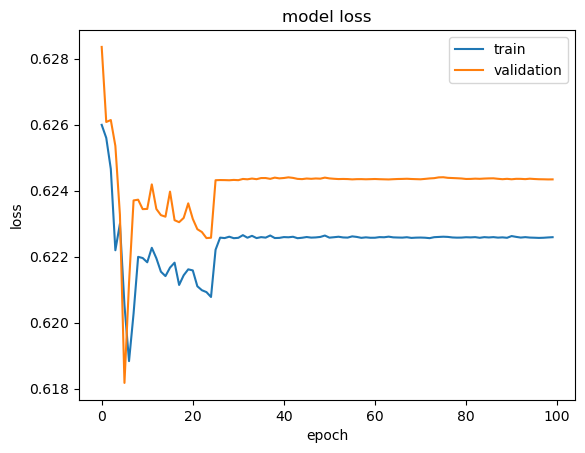

In [61]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Image Augmentation Techniques
Image Rotation
Image Shifting
Image Flipping
Image Noising
Image Blurring

In [62]:
# importing libraries
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline

1. Image Rotation

Original Image


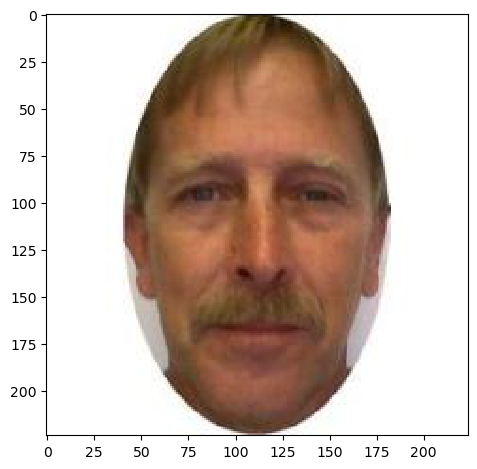

In [65]:
# reading the image
image = imread('../data/images/1000.jpg')
print('Original Image')
#show original image
imshow(image)

Rotated Image


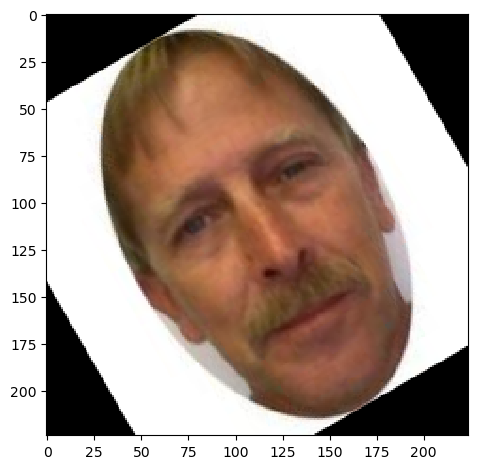

In [66]:
#import required libraries
from skimage.transform import rotate

#rotating the image by 30 degrees
rotated = rotate(image,angle=30)
#plot the rotated image
print('Rotated Image')
imshow(rotated)

2. Image Shifting

Text(0.5, 1.0, 'Original Image')

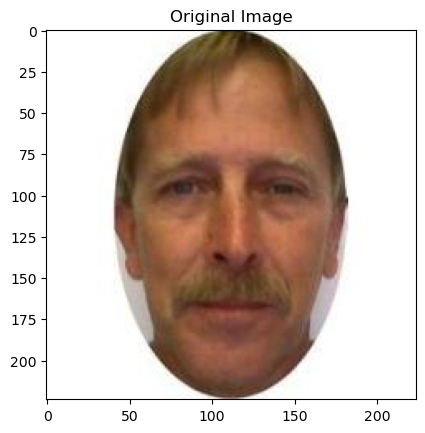

In [67]:
#read the image
image = imread('../data/images/1000.jpg')

plt.imshow(image)
plt.title('Original Image')

Text(0.5, 1.0, 'Normal Shift')

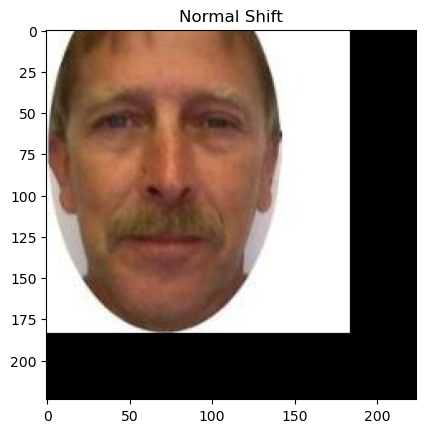

In [68]:
#apply shift operation
from skimage.transform import AffineTransform, warp
transform = AffineTransform(translation=(40,40))
Shift = warp(image,transform)

plt.imshow(Shift)
plt.title('Normal Shift')

Text(0.5, 1.0, 'Wrap Shift')

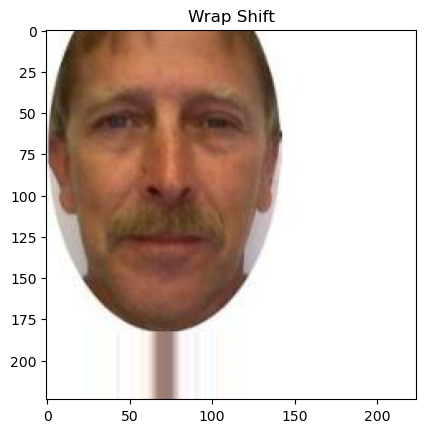

In [69]:
# filling the black portion of image
wrapShift = warp(image,transform,mode='edge')
plt.imshow(wrapShift)
plt.title('Wrap Shift')

3. Image Flipping

Text(0.5, 1.0, 'Original Image')

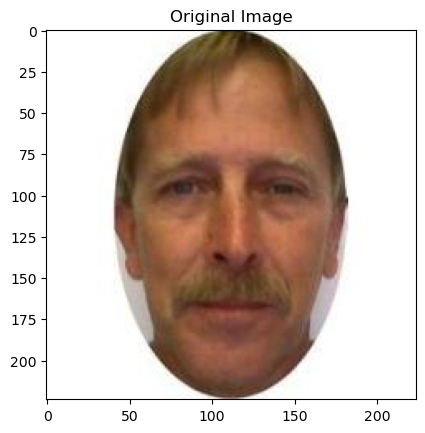

In [71]:
#reading the image
image = imread('../data/images/1000.jpg')

plt.imshow(image)
plt.title('Original Image')

Text(0.5, 1.0, 'Left to Right Flipped')

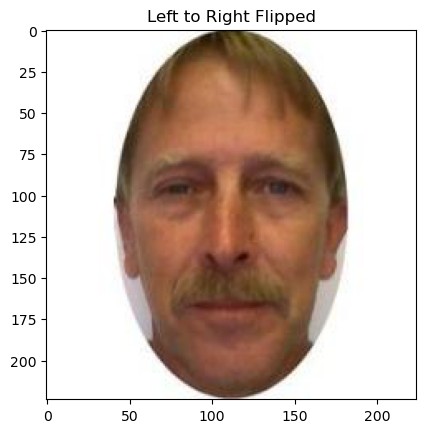

In [72]:
#flip image left-to-right
flipLR = np.fliplr(image)

plt.imshow(flipLR)
plt.title('Left to Right Flipped')

Text(0.5, 1.0, 'Up Down Flipped')

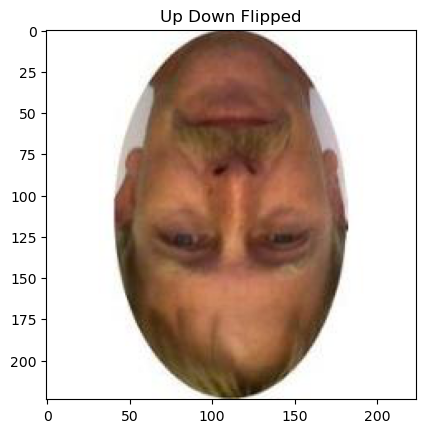

In [73]:
#flip image up-to-down
flipUD = np.flipud(image)

plt.imshow(flipUD)
plt.title('Up Down Flipped')

4. Image Noising

Text(0.5, 1.0, 'Original Image')

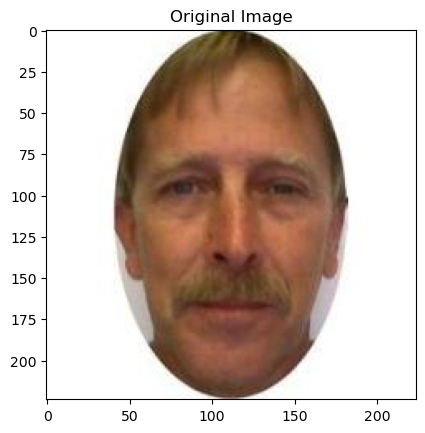

In [74]:
#read the image
image = imread('../data/images/1000.jpg')

plt.imshow(image)
plt.title('Original Image')

Text(0.5, 1.0, 'Random Noise')

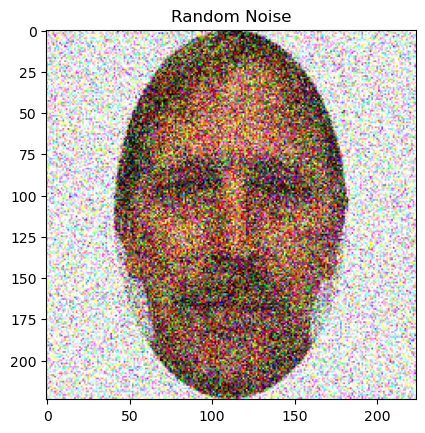

In [75]:
# importing library first
from skimage.util import random_noise
#add random noise to the image
noisyRandom = random_noise(image,var=0.1)

plt.imshow(noisyRandom)
plt.title('Random Noise')

Text(0.5, 1.0, 'Gaussian Noise')

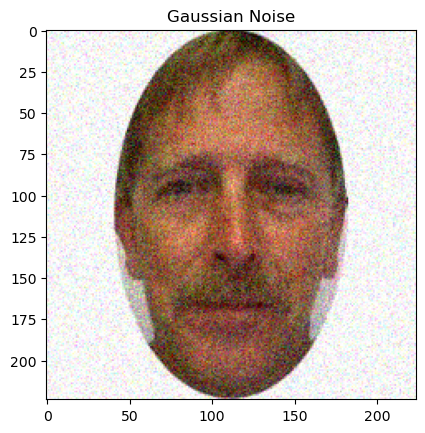

In [76]:
#add gaussian noise to the image
noisyGaussian = random_noise(image,mode='gaussian')

plt.imshow(noisyGaussian)
plt.title('Gaussian Noise')

5. Image Blurring

Text(0.5, 1.0, 'Original Image')

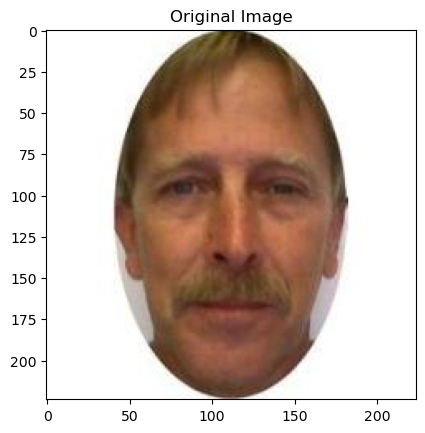

In [77]:
#read the image
image = imread('../data/images/1000.jpg')

plt.imshow(image)
plt.title('Original Image')

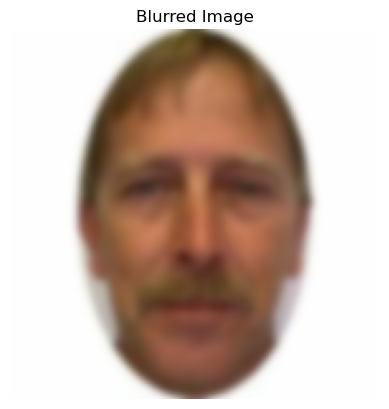

In [87]:
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from skimage.color import rgb2gray
import numpy as np

# Ensure the image is in float64 format for proper processing
image_float = image.astype(np.float64) / 255.0

# Check if the image is grayscale or color
if image.ndim == 3:
    # If the image is color, apply Gaussian blur to each color channel separately
    blurred_channels = [gaussian(image_float[:, :, i], sigma=2.5) for i in range(image.shape[2])]
    
    # Recombine the blurred color channels
    blurred = np.stack(blurred_channels, axis=-1)
else:
    # If the image is grayscale, apply Gaussian blur directly
    blurred = gaussian(image_float, sigma=2.5)

# Clip values to [0, 1] range
blurred = np.clip(blurred, 0, 1)

# Display the blurred image
plt.imshow(blurred)
plt.title('Blurred Image')
plt.axis('off')
plt.show()
